In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

## Reading in the Data

In [182]:
dashboard_2015 = pd.read_csv(r'.\Datasets\2015 Dashboard.csv')
batted_ball_2015 = pd.read_csv(r'.\Datasets\2015 Batted Ball.csv')
statcast_2015 = pd.read_csv(r'.\Datasets\2015 Statcast.csv')
dashboard_2016 = pd.read_csv(r'.\Datasets\2016 Dashboard.csv')
batted_ball_2016 = pd.read_csv(r'.\Datasets\2016 Batted Ball.csv')
statcast_2016 = pd.read_csv(r'.\Datasets\2016 Statcast.csv')
dashboard_2017 = pd.read_csv(r'.\Datasets\2017 Dashboard.csv')
batted_ball_2017 = pd.read_csv(r'.\Datasets\2017 Batted Ball.csv')
statcast_2017 = pd.read_csv(r'.\Datasets\2017 Statcast.csv')
dashboard_2018 = pd.read_csv(r'.\Datasets\2018 Dashboard.csv')
batted_ball_2018 = pd.read_csv(r'.\Datasets\2018 Batted Ball.csv')
statcast_2018 = pd.read_csv(r'.\Datasets\2018 Statcast.csv')
dashboard_2019 = pd.read_csv(r'.\Datasets\2019 Dashboard.csv')
batted_ball_2019 = pd.read_csv(r'.\Datasets\2019 Batted Ball.csv')
statcast_2019 = pd.read_csv(r'.\Datasets\2019 Statcast.csv')
dashboard_2020 = pd.read_csv(r'.\Datasets\2020 Dashboard.csv')
batted_ball_2020 = pd.read_csv(r'.\Datasets\2020 Batted Ball.csv')
statcast_2020 = pd.read_csv(r'.\Datasets\2020 Statcast.csv')
dashboard_2021 = pd.read_csv(r'.\Datasets\2021 Dashboard.csv')
batted_ball_2021 = pd.read_csv(r'.\Datasets\2021 Batted Ball.csv')
statcast_2021 = pd.read_csv(r'.\Datasets\2021 Statcast.csv')
dashboard_2022 = pd.read_csv(r'.\Datasets\2022 Dashboard.csv')
batted_ball_2022 = pd.read_csv(r'.\Datasets\2022 Batted Ball.csv')
statcast_2022 = pd.read_csv(r'.\Datasets\2022 Statcast.csv')

### Dealing with 2020

Due to the pandemic, there were only 60 regular season games in the 2020 MLB season, as opposed to 162 in a normal year. To work around this, I lowered the plate appearance threshold in 2020 to 70, which resulted in a similar-sized player pool (approximately 350) to the rest of the years, and for any "counting stats," like Home Runs or Plate Apppearances or whatever, I will scale them up by an appropriate factor to make it seem like it was over a 162 game season. This does however not address the variance in home runs vs. predictive factors in a smaller sample of games (i.e. hitting 15 home runs in 60 games when the data suggests the expected HR total was 10 now becomes hitting 40 home runs with an expected total of like 25), but we're just going to have to live with it and hopefully that variance evens out across the player pool.

## Cleaning the Data

- Combine yearly frames by player
- Add a year column
- Add following season HR total to the frames
- Filter out players with a missing value in the HR total
- Subset variables that could be useful
- Divide yearly frames into 80% train and 20% test using random functions with a set seed
- Combine the yearly train frames into an overall train set and same for test
- Format percentages

In [183]:
dashboard_2015_merge = dashboard_2015.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2015_merge = batted_ball_2015.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2015_merge = statcast_2015.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2015 = pd.merge(dashboard_2015_merge, batted_ball_2015_merge, on = 'playerid')
temp_frame_2015_2 = pd.merge(temp_frame_2015, statcast_2015_merge, on = 'playerid')

temp_frame_2015_2['Year'] = 2015

next_season_hr_2015 = dashboard_2016.loc[:, ['HR', 'playerid']]
next_season_hr_2015 = next_season_hr_2015.rename(columns = {'HR':'Next_Year_HR'})

frame_2015 = pd.merge(temp_frame_2015_2, next_season_hr_2015, on = 'playerid')

frame_2015.shape

(271, 22)

In [184]:
271 * 0.8

216.8

In [185]:
train_2015 = frame_2015.sample(n = 217, random_state = 1)
temp_df = frame_2015.merge(train_2015.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2015 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2015 = test_2015.drop('_merge', axis = 1)

In [186]:
dashboard_2016_merge = dashboard_2016.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2016_merge = batted_ball_2016.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2016_merge = statcast_2016.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2016 = pd.merge(dashboard_2016_merge, batted_ball_2016_merge, on = 'playerid')
temp_frame_2016_2 = pd.merge(temp_frame_2016, statcast_2016_merge, on = 'playerid')

temp_frame_2016_2['Year'] = 2016

next_season_hr_2016 = dashboard_2017.loc[:, ['HR', 'playerid']]
next_season_hr_2016 = next_season_hr_2016.rename(columns = {'HR':'Next_Year_HR'})

frame_2016 = pd.merge(temp_frame_2016_2, next_season_hr_2016, on = 'playerid')

frame_2016.shape

(261, 22)

In [187]:
261 * 0.8

208.8

In [188]:
train_2016 = frame_2016.sample(n = 219, random_state = 1)
temp_df = frame_2016.merge(train_2016.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2016 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2016 = test_2016.drop('_merge', axis = 1)

In [189]:
dashboard_2017_merge = dashboard_2017.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2017_merge = batted_ball_2017.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2017_merge = statcast_2017.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2017 = pd.merge(dashboard_2017_merge, batted_ball_2017_merge, on = 'playerid')
temp_frame_2017_2 = pd.merge(temp_frame_2017, statcast_2017_merge, on = 'playerid')

temp_frame_2017_2['Year'] = 2017

next_season_hr_2017 = dashboard_2018.loc[:, ['HR', 'playerid']]
next_season_hr_2017 = next_season_hr_2017.rename(columns = {'HR':'Next_Year_HR'})

frame_2017 = pd.merge(temp_frame_2017_2, next_season_hr_2017, on = 'playerid')

frame_2017.shape

(277, 22)

In [190]:
277 * 0.8

221.60000000000002

In [191]:
train_2017 = frame_2017.sample(n = 222, random_state = 1)
temp_df = frame_2017.merge(train_2017.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2017 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2017 = test_2017.drop('_merge', axis = 1)

In [192]:
dashboard_2018_merge = dashboard_2018.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2018_merge = batted_ball_2018.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2018_merge = statcast_2018.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2018 = pd.merge(dashboard_2018_merge, batted_ball_2018_merge, on = 'playerid')
temp_frame_2018_2 = pd.merge(temp_frame_2018, statcast_2018_merge, on = 'playerid')

temp_frame_2018_2['Year'] = 2018

next_season_hr_2018 = dashboard_2019.loc[:, ['HR', 'playerid']]
next_season_hr_2018 = next_season_hr_2018.rename(columns = {'HR':'Next_Year_HR'})

frame_2018 = pd.merge(temp_frame_2018_2, next_season_hr_2018, on = 'playerid')

frame_2018.shape

(262, 22)

In [193]:
262 * 0.8

209.60000000000002

In [194]:
train_2018 = frame_2018.sample(n = 210, random_state = 1)
temp_df = frame_2018.merge(train_2018.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2018 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2018 = test_2018.drop('_merge', axis = 1)

In [195]:
dashboard_2019_merge = dashboard_2019.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2019_merge = batted_ball_2019.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2019_merge = statcast_2019.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2019 = pd.merge(dashboard_2019_merge, batted_ball_2019_merge, on = 'playerid')
temp_frame_2019_2 = pd.merge(temp_frame_2019, statcast_2019_merge, on = 'playerid')

temp_frame_2019_2['Year'] = 2019

next_season_hr_2019 = dashboard_2020.loc[:, ['HR', 'playerid']]
next_season_hr_2019['HR'] = next_season_hr_2019['HR'].apply(lambda x: int((162/60)*x))
next_season_hr_2019 = next_season_hr_2019.rename(columns = {'HR':'Next_Year_HR'})

frame_2019 = pd.merge(temp_frame_2019_2, next_season_hr_2019, on = 'playerid')

frame_2019.shape

(282, 22)

In [196]:
282 * 0.8

225.60000000000002

In [197]:
train_2019 = frame_2019.sample(n = 226, random_state = 1)
temp_df = frame_2019.merge(train_2019.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2019 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2019 = test_2019.drop('_merge', axis = 1)

In [198]:
dashboard_2020_merge = dashboard_2020.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
dashboard_2020_merge['G'] = dashboard_2020_merge['G'].apply(lambda x: int((162/60) * x))
dashboard_2020_merge['PA'] = dashboard_2020_merge['PA'].apply(lambda x: int((162/60) * x))
dashboard_2020_merge['HR'] = dashboard_2020_merge['HR'].apply(lambda x: int((162/60) * x))
batted_ball_2020_merge = batted_ball_2020.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2020_merge = statcast_2020.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2020 = pd.merge(dashboard_2020_merge, batted_ball_2020_merge, on = 'playerid')
temp_frame_2020_2 = pd.merge(temp_frame_2020, statcast_2020_merge, on = 'playerid')

temp_frame_2020_2['Year'] = 2020

next_season_hr_2020 = dashboard_2021.loc[:, ['HR', 'playerid']]
next_season_hr_2020 = next_season_hr_2020.rename(columns = {'HR':'Next_Year_HR'})

frame_2020 = pd.merge(temp_frame_2020_2, next_season_hr_2020, on = 'playerid')

frame_2020.shape

(271, 22)

In [199]:
271 * 0.8

216.8

In [200]:
train_2020 = frame_2020.sample(n = 217, random_state = 1)
temp_df = frame_2020.merge(train_2020.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2020 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2020 = test_2020.drop('_merge', axis = 1)

In [201]:
dashboard_2021_merge = dashboard_2021.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2021_merge = batted_ball_2021.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2021_merge = statcast_2021.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2021 = pd.merge(dashboard_2021_merge, batted_ball_2021_merge, on = 'playerid')
temp_frame_2021_2 = pd.merge(temp_frame_2021, statcast_2021_merge, on = 'playerid')

temp_frame_2021_2['Year'] = 2021

next_season_hr_2021 = dashboard_2022.loc[:, ['HR', 'playerid']]
next_season_hr_2021 = next_season_hr_2021.rename(columns = {'HR':'Next_Year_HR'})

frame_2021 = pd.merge(temp_frame_2021_2, next_season_hr_2021, on = 'playerid')

frame_2021.shape

(267, 22)

In [202]:
267 * 0.8

213.60000000000002

In [203]:
train_2021 = frame_2021.sample(n = 214, random_state = 1)
temp_df = frame_2021.merge(train_2021.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2021 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2021 = test_2021.drop('_merge', axis = 1)

In [204]:
train = pd.concat([train_2015, train_2016, train_2017, train_2018, train_2019, train_2020, train_2021])

In [205]:
train = train.rename(columns = {'Barrel%': 'Barrel', 'HardHit%': 'HardHit', 'HR/FB': 'HRperFB', 'BB%':'BB', 'K%':'K', 'FB%':'FB', 'Pull%':'Pull', 'GB%':'GB', 'LD%':'LD','IFFB%':'IFFB', 'Cent%':'Cent', 'Oppo%':'Oppo'})

In [206]:
test = pd.concat([test_2015, test_2016, test_2017, test_2018, test_2019, test_2020, test_2021])

In [207]:
test = test.rename(columns = {'Barrel%': 'Barrel', 'HardHit%': 'HardHit', 'HR/FB': 'HRperFB', 'BB%':'BB', 'K%':'K', 'FB%':'FB', 'Pull%':'Pull', 'GB%':'GB', 'LD%':'LD','IFFB%':'IFFB', 'Cent%':'Cent', 'Oppo%':'Oppo'})

In [208]:
def remove_percentage_sign(variable):
    if variable.dtypes == 'O':
        variable = variable.str.replace('%', '')
        variable = pd.to_numeric(variable, errors = 'coerce')
    return variable

In [209]:
train.loc[:, 'G':] = train.loc[:, 'G':].apply(remove_percentage_sign)

In [210]:
test.loc[:, 'G':] = test.loc[:, 'G':].apply(remove_percentage_sign)

In [211]:
train = train.reset_index().drop('index', axis = 1)

## Notes on Cleaning

`train` and `test` datasets have been created using 80% and 20% of the observations from 2015-2021 respectively, just run all of the code above and it should work.

## Variable Descriptions

Excluding `'Name'` and `'playerid'`, there are 20 variables in the dataset to work with. Below are descriptions of them all.

All percentages are on a scale of 0 to 100, not 0 to 1.

- `'Next_Year_HR'` (Response): Pretty explanatory, it's the number of home runs a player hit in the following season, which is what we're trying to predict. So, if an observation is Mike Trout in 2016, the value in this column is the number of home runs he hit in the 2017 season.
- `'G'`: The number of games played (out of 162) that season.
- `'PA'`: The number of plate appearances recorded that season.
- `'HR'`: The number of home runs hit that season.
- `'BB'`: The percentage of plate apperances that resulted in a walk.
- `'K'`: The percentage of plate appearances that resulted in a strikeout.
- `'LD'`/`'GB'`/`'FB'`: The percentage of batted ball events that are line drives/ground balls/fly balls.
- `'IFFB'`: The percentage of fly balls that are infield fly balls.
- `'HRperFB`': The percentage of fly balls that are home runs.
- `'Pull'`/`'Cent'`/`'Oppo'`: The percentage of batted ball events that are hit in the three directions. For a right-handed hitter, pulling the ball means hitting it to left field and going to opposite field means hitting it to right field, and vice versa for left-handed batters. Generally, players will hit more home runs pulling the ball than going to center field, and even more than going to opposite field.
- `'EV'`: Average exit velocity in mph of the ball off the bat of all batted balls.
- `'maxEV'`: Fastest recorded exit velocity in mph of all batted balls.
- `'LA'`: Average angle of the trajectory of the ball off the bat of all batted balls. On a scale of -90 to 90 for each individual event, positive meaning it's going in the air, and negative meaning it's going into the ground.
- `'Barrel'`: Percentage of batted balls with exit velocity/launch angle profiles that have historically resulted in a hit at least 50% of the time.
- `'HardHit'`: The exact formula for determining what a qualifies as a hard hit ball is proprietary, but the name is pretty self explanatory.

# Exploratory Data Analysis

## Correlations

In [212]:
train.corrwith(train['Next_Year_HR']).sort_values(ascending = False)

Next_Year_HR    1.000000
HR              0.580841
Barrel          0.510056
EV              0.484289
HardHit         0.475586
maxEV           0.469366
HRperFB         0.456887
FB              0.355472
PA              0.331875
LA              0.286869
Pull            0.284040
G               0.248870
BB              0.186282
K               0.162704
IFFB            0.055192
playerid        0.036181
Year           -0.047982
LD             -0.130726
Cent           -0.167033
Oppo           -0.246531
GB             -0.292824
dtype: float64

## Plotting Relationships Between Response and Predictors

### `HR`

Text(0, 0.5, 'Next Season HR')

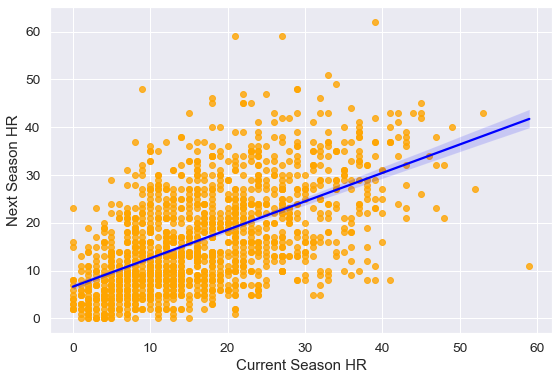

In [213]:
plt.rcParams["figure.figsize"] = (9,6)
ax = sns.regplot(x = train['HR'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('Current Season HR')
plt.ylabel('Next Season HR')

### `Barrel`

Text(0, 0.5, 'Next Season HR')

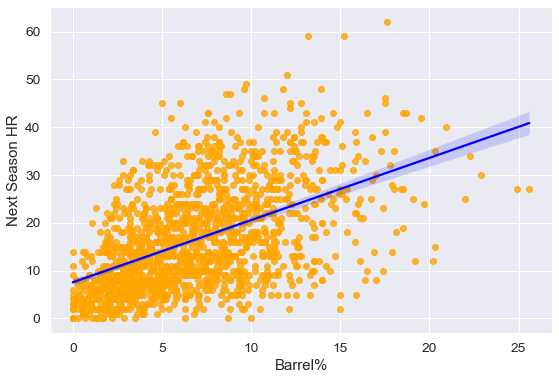

In [214]:
ax = sns.regplot(x = train['Barrel'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('Barrel%')
plt.ylabel('Next Season HR')

### `EV`

Text(0, 0.5, 'Next Season HR')

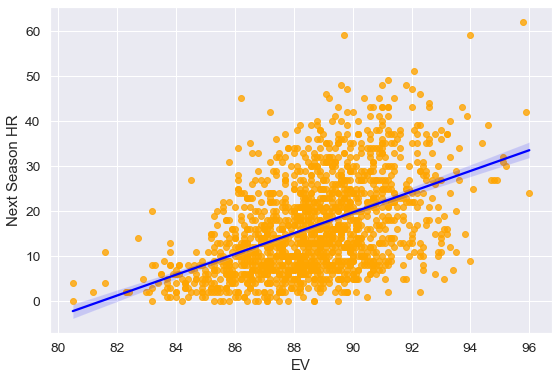

In [215]:
ax = sns.regplot(x = train['EV'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('EV')
plt.ylabel('Next Season HR')

### `HardHit`

Text(0, 0.5, 'Next Season HR')

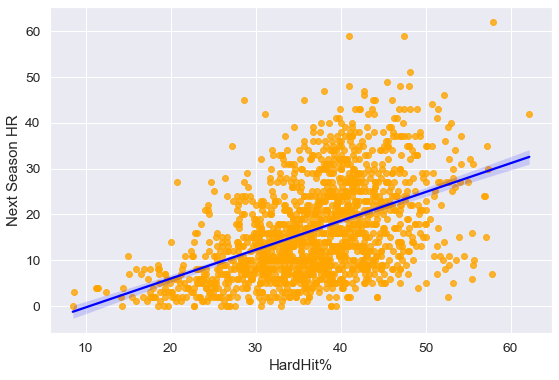

In [216]:
ax = sns.regplot(x = train['HardHit'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('HardHit%')
plt.ylabel('Next Season HR')

### `MaxEV`

Text(0, 0.5, 'Next Season HR')

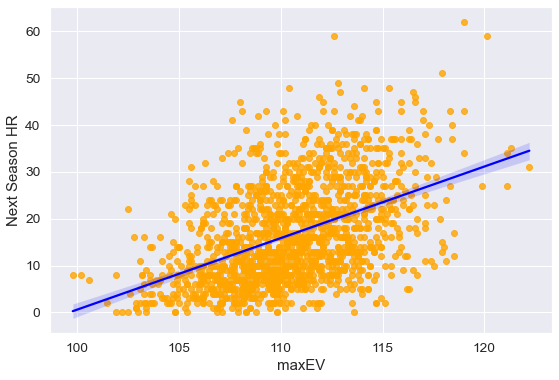

In [217]:
ax = sns.regplot(x = train['maxEV'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('maxEV')
plt.ylabel('Next Season HR')

### `HRperFB`

Text(0, 0.5, 'Next Season HR')

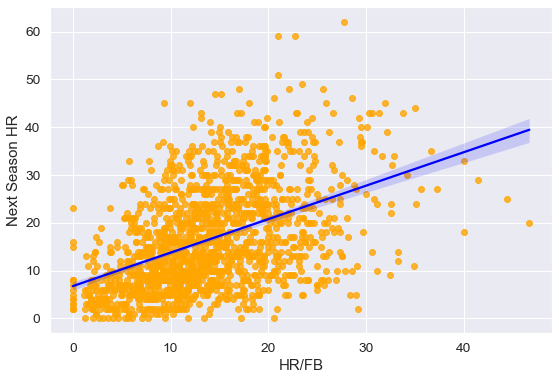

In [218]:
ax = sns.regplot(x = train['HRperFB'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('HR/FB')
plt.ylabel('Next Season HR')

Seems like everything is basically linear, so transformations will probably not be necessary, at least with individual predictors.

### Creating a Visual for Presentation/Report

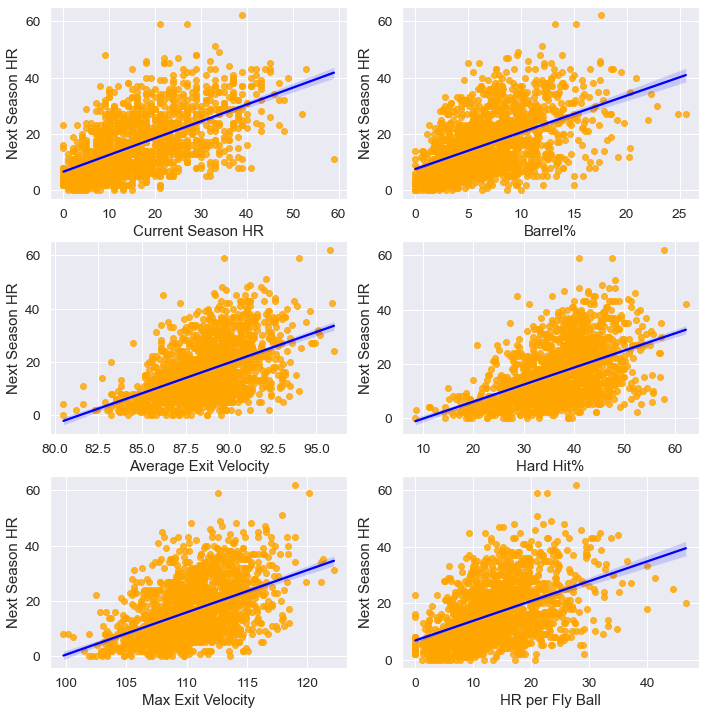

In [219]:
fig, axes = plt.subplots(3,2, figsize = (10,10))
fig.tight_layout()

sns.regplot(x = train['HR'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'}, ax = axes[0,0])
axes[0,0].set_xlabel('Current Season HR')
axes[0,0].set_ylabel('Next Season HR')

sns.regplot(x = train['Barrel'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'}, ax = axes[0,1])
axes[0,1].set_xlabel('Barrel%')
axes[0,1].set_ylabel('Next Season HR')

sns.regplot(x = train['EV'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'}, ax = axes[1,0])
axes[1,0].set_xlabel('Average Exit Velocity')
axes[1,0].set_ylabel('Next Season HR')

sns.regplot(x = train['HardHit'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'}, ax = axes[1,1])
axes[1,1].set_xlabel('Hard Hit%')
axes[1,1].set_ylabel('Next Season HR')

sns.regplot(x = train['maxEV'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'}, ax = axes[2,0])
axes[2,0].set_xlabel('Max Exit Velocity')
axes[2,0].set_ylabel('Next Season HR')

sns.regplot(x = train['HRperFB'], y = train['Next_Year_HR'], color = 'orange', line_kws = {'color':'blue'}, ax = axes[2,1])
axes[2,1].set_xlabel('HR per Fly Ball')
axes[2,1].set_ylabel('Next Season HR')

plt.savefig('correlation_plots.png')

# Model with the Six Most Correlated Variables

In [220]:
model = smf.ols(formula = 'Next_Year_HR~HR+Barrel+EV+HardHit+maxEV+HRperFB+I(HardHit**2)', data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Next_Year_HR   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     142.2
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          2.95e-161
Time:                        12:19:05   Log-Likelihood:                -5384.7
No. Observations:                1525   AIC:                         1.079e+04
Df Residuals:                    1517   BIC:                         1.083e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -128.5473     20.994     -6.123      0.000    -169.728     -87.367
HR                  0.4451      0.032     14.108      0.000       0.383       0.507
Barrel              0.3925      0.112      3.510      0.000       0.173       0.612
EV                  0.9160      0.248      3.690      0.000       0.429       1.403
HardHit             0.3219      0.169      1.901      0.057      -0.010       0.654
maxEV               0.4818      0.091      5.287      0.000       0.303       0.661
HRperFB            -0.2315      0.060     -3.834      0.000      -0.350      -0.113
I(HardHit ** 2)    -0.0057      0.002     -2.408      0.016      -0.010      -0.001
==============================================================================
Omnibus:                       78.420   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.461
Skew:                           0.532   Prob(JB):                     5.07e-21
Kurtosis:                       3.581   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### RSE

In [221]:
np.sqrt(model.mse_resid)

8.28670207219361

### RMSE

In [222]:
pred = model.predict(test)
mean_squared_error(test['Next_Year_HR'], pred, squared = False)

8.180564938161414

## Residual Plot

Text(0, 0.5, 'Residuals')

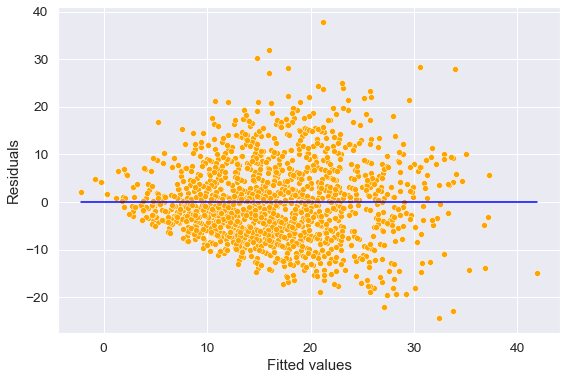

In [223]:
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(), model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

## Outlier Detection

### Outliers

In [224]:
out = model.outlier_test()

Text(0, 0.5, 'Residuals')

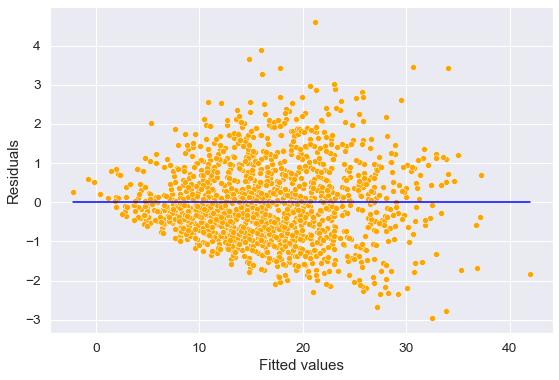

In [225]:
ax = sns.scatterplot(x = model.fittedvalues, y=out.student_resid,color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [226]:
np.sum((np.abs(out.student_resid)>3))

8

### High Leverage Points

In [227]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
average_leverage = (model.df_model+1)/model.nobs
high_leverage_threshold = 4*average_leverage
np.sum(leverage>high_leverage_threshold)

27

### Influential Points

In [228]:
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],
                                           (np.where(leverage>high_leverage_threshold)[0])))

In [229]:
train.shape[0]-train_filtered.shape[0]

1

## Updated Model

In [230]:
model = smf.ols(formula = 'Next_Year_HR~HR+Barrel+EV+HardHit+maxEV+HRperFB+I(HardHit**2)', data = train_filtered).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Next_Year_HR   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     140.6
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          9.83e-160
Time:                        12:20:19   Log-Likelihood:                -5375.8
No. Observations:                1524   AIC:                         1.077e+04
Df Residuals:                    1516   BIC:                         1.081e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -126.7143     20.927     -6.055      0.000    -167.763     -85.665
HR                  0.4428      0.031     14.082      0.000       0.381       0.505
Barrel              0.3947      0.111      3.542      0.000       0.176       0.613
EV                  0.8939      0.247      3.612      0.000       0.409       1.379
HardHit             0.3880      0.170      2.286      0.022       0.055       0.721
maxEV               0.4723      0.091      5.198      0.000       0.294       0.651
HRperFB            -0.2275      0.060     -3.781      0.000      -0.346      -0.109
I(HardHit ** 2)    -0.0066      0.002     -2.790      0.005      -0.011      -0.002
==============================================================================
Omnibus:                       75.276   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.631
Skew:                           0.524   Prob(JB):                     5.68e-20
Kurtosis:                       3.546   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### RSE

In [231]:
np.sqrt(model.mse_resid)

8.257467196473222

### RMSE

In [232]:
pred = model.predict(test)
mean_squared_error(test['Next_Year_HR'], pred, squared = False)

8.168925903929695

## Observations

- No overfitting, test RMSE and train RSE line up well
- Linearity assumption seems to be okay
- Constant variance of error terms assumption is definitely violated
    - Model seems to have a much easier time predicting following season totals for players who don't hit very many home runs in the current year
    - This makes sense to an extent as at the top end, HR totals are very volatile, a guy can hit 60 one year and 35 the next, whereas a guy who hits 5 one season isn't suddenly going to hit 25, and injuries also play a small role
- One influential point, which after being dropped, the model was more accurate

# Engineering a New Model

In [266]:
model = smf.ols(formula = 'np.sqrt(Next_Year_HR)~HR+Barrel+(EV*maxEV)+HardHit+I(HardHit**2)+(HRperFB*FB)+(IFFB*FB)+Pull+PA+BB+K+GB', data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(Next_Year_HR)   R-squared:                       0.438
Model:                               OLS   Adj. R-squared:                  0.431
Method:                    Least Squares   F-statistic:                     69.00
Date:                   Fri, 03 Mar 2023   Prob (F-statistic):          2.39e-174
Time:                           12:45:14   Log-Likelihood:                -2204.8
No. Observations:                   1525   AIC:                             4446.
Df Residuals:                       1507   BIC:                             4541.
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          85.9873     41.741      2.060      0.040       4.111     167.864
HR                  0.0171      0.009      1.883      0.060      -0.001       0.035
Barrel              0.0208      0.018      1.140      0.254      -0.015       0.056
EV                 -1.0637      0.474     -2.243      0.025      -1.994      -0.134
maxEV              -0.8581      0.379     -2.263      0.024      -1.602      -0.114
EV:maxEV            0.0104      0.004      2.442      0.015       0.002       0.019
HardHit             0.1310      0.031      4.293      0.000       0.071       0.191
I(HardHit ** 2)    -0.0016      0.000     -3.965      0.000      -0.002      -0.001
HRperFB             0.0599      0.021      2.921      0.004       0.020       0.100
FB                  0.0406      0.015      2.740      0.006       0.012       0.070
HRperFB:FB         -0.0015      0.001     -2.444      0.015      -0.003      -0.000
IFFB                0.0343      0.028      1.234      0.218      -0.020       0.089
IFFB:FB            -0.0007      0.001     -0.860      0.390      -0.002       0.001
Pull                0.0163      0.006      2.849      0.004       0.005       0.028
PA                  0.0014      0.000      3.730      0.000       0.001       0.002
BB                 -0.0098      0.009     -1.087      0.277      -0.027       0.008
K                  -0.0091      0.006     -1.452      0.147      -0.021       0.003
GB                 -0.0151      0.009     -1.690      0.091      -0.033       0.002
==============================================================================
Omnibus:                        7.915   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.880
Skew:                          -0.174   Prob(JB):                       0.0195
Kurtosis:                       3.048   Cond. No.                     1.57e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### RSE

In [267]:
np.sqrt(((train['Next_Year_HR'] - (model.fittedvalues**2))**2).mean())

8.18580192251846

### RMSE

In [268]:
pred = model.predict(test)
np.sqrt(((test['Next_Year_HR'] - (pred**2))**2).mean())

8.043329798002166

## Residual Plot

Text(0, 0.5, 'Residuals')

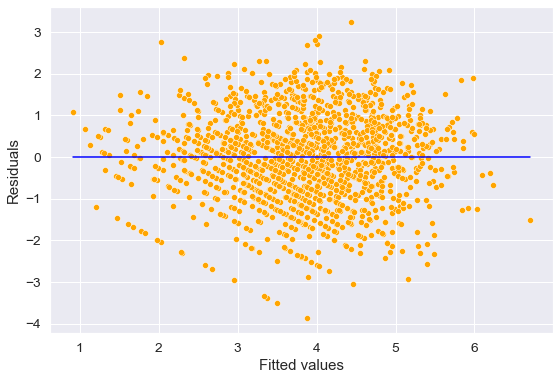

In [269]:
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(), model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

## Outlier Detection

### Outliers

In [270]:
out = model.outlier_test()

Text(0, 0.5, 'Residuals')

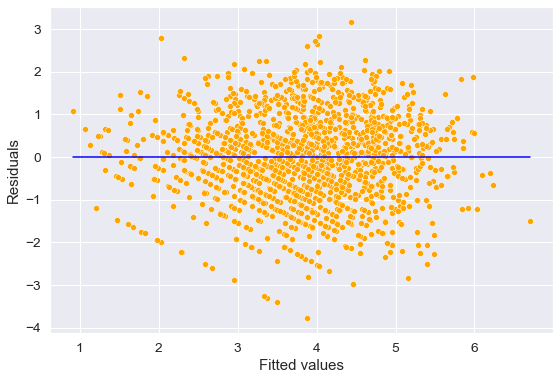

In [271]:
ax = sns.scatterplot(x = model.fittedvalues, y=out.student_resid,color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [272]:
np.sum((np.abs(out.student_resid)>3))

5

### High Leverage Points

In [273]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
average_leverage = (model.df_model+1)/model.nobs
high_leverage_threshold = 4*average_leverage
np.sum(leverage>high_leverage_threshold)

24

### Influential Points

In [274]:
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],
                                           (np.where(leverage>high_leverage_threshold)[0])))

In [275]:
train.shape[0]-train_filtered.shape[0]

0

## Observations

- Few predictors with high p-values now
- Able to get train RSE and test RMSE to go down though
- Linearity assumption and constant variance of error terms assumption both look much better with taking the square root of the response
- Still no influential points, which is also good
- **Think this is basically the best possible, and if it isn't, it's close**

# Trying Lasso Because Why Not

In [58]:
y = train['Next_Year_HR']
X = train.iloc[:,[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [59]:
alphas = 10**np.linspace(10,-2,100)*0.1

In [60]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

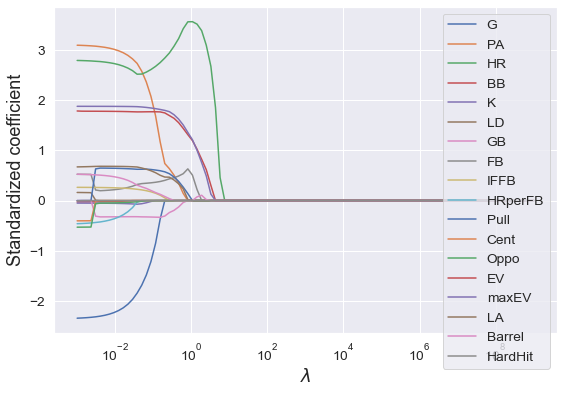

In [61]:
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]);

In [62]:
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)
lassocv.alpha_

0.05

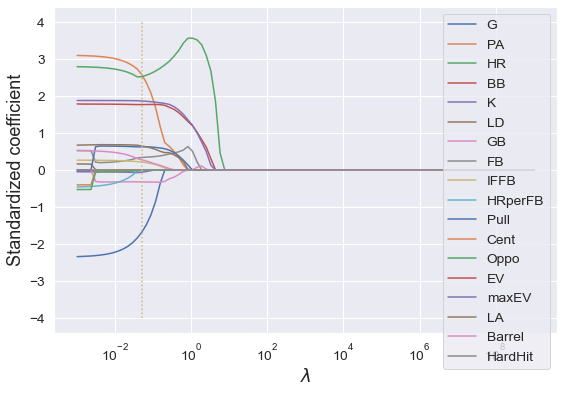

In [63]:
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns[[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]);
plt.plot([lassocv.alpha_,lassocv.alpha_],[-4,4],':')

### RSE

In [64]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xstd)
np.sqrt(((pred-train['Next_Year_HR'])**2).mean())

8.141505675471118

### RMSE

In [65]:
Xtest = test.iloc[:,[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]
Xtest_std = scaler.transform(Xtest)

In [66]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

In [67]:
np.sqrt(((pred-test['Next_Year_HR'])**2).mean())

8.136334981853635

### Coefficients and $R^2$

In [68]:
lasso.coef_

array([-1.68038103,  2.56960505,  2.51588206, -0.        , -0.06249362,
        0.        , -0.32402915,  0.3373001 ,  0.21207321, -0.        ,
        0.62269778, -0.        , -0.01402876,  1.76347944,  1.86058027,
        0.64702814,  0.27226912,  0.        ])

In [69]:
r2_score(lasso.predict(Xstd),y)

-0.45469770476085425

## Formula

$\text{Next_Year_HR} = -1.68 \cdot \text{G} + 2.57 \cdot \text{PA} + 2.52 \cdot \text{HR} -0.06 \cdot \text{K_pct} - 0.32 \cdot \text{GB_pct} + 0.34 \cdot \text{FB_pct} + 0.21 \cdot \text{IFFB_pct} + 0.62 \cdot \text{Pull_pct} - 0.01 \cdot \text{Oppo_pct} + 1.76 \cdot \text{Avg_EV} + 1.86 \cdot \text{max_EV} + 0.65 \cdot \text{Avg_LA} + 0.27 \cdot \text{Barrel_pct}$

# Making Predictions for the 2023 Season

In [247]:
dashboard_2022_merge = dashboard_2022.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2022_merge = batted_ball_2022.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2022_merge = statcast_2022.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2022 = pd.merge(dashboard_2022_merge, batted_ball_2022_merge, on = 'playerid')
temp_frame_2022_2 = pd.merge(temp_frame_2022, statcast_2022_merge, on = 'playerid')

temp_frame_2022_2['Year'] = 2022

player_data_2022 = temp_frame_2022_2

player_data_2022 = player_data_2022.rename(columns = {'Barrel%': 'Barrel', 'HardHit%': 'HardHit', 'HR/FB': 'HRperFB', 'BB%':'BB', 'K%':'K', 'FB%':'FB', 'Pull%':'Pull', 'GB%':'GB', 'LD%':'LD','IFFB%':'IFFB', 'Cent%':'Cent', 'Oppo%':'Oppo'})
player_data_2022.loc[:, 'G':] = player_data_2022.loc[:, 'G':].apply(remove_percentage_sign)

### Lasso Formula

In [71]:
Xpredict = player_data_2022.iloc[:,[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]
Xpredict_std = scaler.transform(Xpredict)
predictions=lasso.predict(Xpredict_std)

### MLR Formula

In [276]:
predictions = model.predict(player_data_2022)**2

In [277]:
player_data_2022['Predicted_HR_2023'] = predictions
player_data_2022['Predicted_HR_2023_Integers'] = player_data_2022['Predicted_HR_2023'].astype(int)
player_data_2022 = player_data_2022.sort_values(by = 'Predicted_HR_2023', ascending = False)

In [278]:
player_data_2022.loc[:, ['Name', 'Predicted_HR_2023_Integers']].head(20)

,Name,Predicted_HR_2023_Integers
0,Aaron Judge,42
194,Giancarlo Stanton,33
47,Shohei Ohtani,33
80,Kyle Schwarber,32
60,Matt Olson,32
18,Austin Riley,31
72,Vladimir Guerrero Jr.,31
6,Yordan Alvarez,31
42,Pete Alonso,30
220,Rowdy Tellez,29


In [279]:
player_data_2022.loc[:, ['Name', 'Predicted_HR_2023_Integers']].tail(20)

,Name,Predicted_HR_2023_Integers
195,Omar Narvaez,5
209,Tomas Nido,5
163,Tony Kemp,5
304,Alfonso Rivas,5
260,Albert Almora Jr.,5
354,Jonathan Villar,5
257,Matt Reynolds,5
327,Sheldon Neuse,5
277,P.J. Higgins,5
324,Garrett Hampson,5


In [280]:
player_data_2022.loc[player_data_2022['Name'] == 'Luis Robert', ['Name', 'Predicted_HR_2023_Integers']]

,Name,Predicted_HR_2023_Integers
116,Luis Robert,18


In [281]:
player_data_2022['Difference_in_HR'] = player_data_2022['Predicted_HR_2023_Integers'] - player_data_2022['HR']
player_data_2022 = player_data_2022.sort_values(by = 'Difference_in_HR', ascending = False)

In [282]:
player_data_2022.loc[:, ['Name', 'Difference_in_HR', 'Predicted_HR_2023_Integers']].head(20)

,Name,Difference_in_HR,Predicted_HR_2023_Integers
328,Sam Hilliard,12,14
189,Oneil Cruz,11,28
130,Seby Zavala,9,11
316,J.J. Bleday,9,14
240,Jorge Soler,9,22
244,Enrique Hernandez,9,15
310,Franchy Cordero,9,17
224,Kyle Isbel,8,13
214,Ryan Jeffers,8,15
186,Leody Taveras,8,13


In [283]:
player_data_2022.loc[:, ['Name', 'Difference_in_HR', 'Predicted_HR_2023_Integers']].tail(20)

,Name,Difference_in_HR,Predicted_HR_2023_Integers
86,Anthony Santander,-6,27
68,Bryan Reynolds,-6,21
84,Hunter Renfroe,-6,23
63,Nathaniel Lowe,-7,20
183,C.J. Cron,-7,22
18,Austin Riley,-7,31
28,Daulton Varsho,-7,20
91,Anthony Rizzo,-7,25
38,Eugenio Suarez,-8,23
1,Manny Machado,-8,24


In [284]:
player_data_2022['Pct_Difference_in_HR'] = 100*(player_data_2022['Predicted_HR_2023_Integers'] - player_data_2022['HR'])/player_data_2022['HR']
player_data_2022 = player_data_2022.sort_values(by = 'Pct_Difference_in_HR', ascending = False)

In [285]:
player_data_2022.loc[:, ['Name', 'Pct_Difference_in_HR', 'Predicted_HR_2023_Integers']].head(20)

,Name,Pct_Difference_in_HR,Predicted_HR_2023_Integers
239,Jose Azocar,inf,4
187,Nicky Lopez,inf,3
126,Myles Straw,inf,6
274,Nick Madrigal,inf,1
305,Vimael Machin,700.000000,8
252,Cesar Hernandez,700.000000,8
328,Sam Hilliard,600.000000,14
313,Didi Gregorius,500.000000,6
130,Seby Zavala,450.000000,11
306,Adam Engel,400.000000,10


In [286]:
player_data_2022.loc[:, ['Name', 'Pct_Difference_in_HR', 'Predicted_HR_2023_Integers']].tail(20)

,Name,Pct_Difference_in_HR,Predicted_HR_2023_Integers
146,Luis Rengifo,-23.529412,13
183,C.J. Cron,-24.137931,22
42,Pete Alonso,-25.000000,30
1,Manny Machado,-25.000000,24
95,Ty France,-25.000000,15
38,Eugenio Suarez,-25.806452,23
63,Nathaniel Lowe,-25.925926,20
28,Daulton Varsho,-25.925926,20
163,Tony Kemp,-28.571429,5
27,Willy Adames,-29.032258,22
